# 표준 노드링크 데이터를 이용해서 도로 네트워크 만들기

Requirement : `pyshp` and  `pyproj`

원본 데이터 출처 : https://www.its.go.kr/nodelink/intro



In [47]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 27.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.6 MB/s eta 0:00:00


In [2]:
!pip install pyshp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.4 MB/s eta 0:00:00


In [3]:
!pip install pyproj

## 데이터 읽어오기

In [4]:
#import geopandas as gpd # pip install geopandas
#import shapefile # pip install pyshp
import pandas as pd
from pyproj import Transformer, transform # pip install pyproj

In [5]:
# geopandas 필요
df_node = pd.read_pickle('./ex_node.pkl')
df_link = pd.read_pickle('./ex_link.pkl')

In [10]:
df_node.head()

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,geometry,STNL_REG
0,1300000700,101,중부경찰서삼거리,1,None,POINT (385647.694 280879.298),130
1,1300000701,101,대창동1가38-1,1,None,POINT (385730.546 281114.160),130
2,1300004101,101,세븐일레븐,1,None,POINT (385777.235 281265.597),130
3,1300004201,101,중앙동마린센터공영주차장,0,None,POINT (385938.860 281210.125),130
4,1300003901,101,롯데제이티비,1,None,POINT (385681.364 280973.574),130


In [11]:
df_link.head()

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry,STNL_REG
0,1300013801,1320000100,1300004101,4,103,000,7,중앙대로,0,0,000,60,0,0.0,0,168.291414,None,"LINESTRING (385819.190 281428.904, 385770.972 ...",130
1,1300013901,1300004101,1320000100,4,103,000,7,중앙대로,0,0,000,60,0,0.0,0,167.511380,None,"LINESTRING (385783.750 281263.378, 385829.217 ...",130
2,1300013401,1300004101,1300000701,4,103,000,7,중앙대로,0,0,000,60,0,0.0,0,157.997627,None,"LINESTRING (385770.973 281267.316, 385725.205 ...",130
3,1300013501,1300000701,1300004101,4,103,000,7,중앙대로,0,0,000,60,0,0.0,0,157.800507,None,"LINESTRING (385735.479 281112.546, 385783.753 ...",130
4,1300013601,1300004101,1300004201,1,107,000,-,중앙대로148번길,0,0,000,50,0,0.0,0,170.001838,None,"LINESTRING (385775.766 281259.335, 385936.392 ...",130


In [55]:
#df_node.astype({'STNL_REG': 'int'})# 권역번호의 데이터타입 변환

In [6]:
# Change coordinate system
# korea 2000/central belt 2010 (epsg:5186) to wgs84(epsg:4326)
transformer = Transformer.from_crs(5186, 4326)
lat,lon=transformer.transform(df_node['geometry'].y,df_node['geometry'].x)
df_node['latitude'] = lat
df_node['longitude']= lon

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ulsan=[str(i) for i in range(192,197)] # 울산
nodes=df_node[df_node['STNL_REG'].isin(ulsan)]
links=df_link[df_link['STNL_REG'].isin(ulsan)]

In [9]:
nodes.head(5)

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,geometry,STNL_REG,latitude,longitude
10867,1920000301,101,삼성아파트단지입구,1,None,POINT (406103.228 331363.950),192,35.557848,129.273062
10868,1920001001,101,다운현대아파트입구,1,None,POINT (405928.286 331516.273),192,35.559257,129.271173
10869,1920002000,101,복산삼거리,1,None,POINT (410942.749 332068.364),192,35.563174,129.326581
10870,1920057300,101,울산중학교,0,None,POINT (410751.313 332322.827),192,35.565507,129.324537
10871,1920057400,101,복산동704-3,0,None,POINT (410607.243 332228.751),192,35.564690,129.322925


In [32]:
links.head(5)

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry,STNL_REG
31441,1920177200,1920057500,1920057300,1,104,000,-,손골3길,0,0,000,40,0,0.0,0,63.253430,None,"LINESTRING (410813.249 332323.772, 410789.964 ...",192
31442,1920177300,1920057300,1920057500,1,104,000,-,손골3길,0,0,000,40,0,0.0,0,63.271718,None,"LINESTRING (410750.912 332316.840, 410768.249 ...",192
31443,1920192301,1920005200,1920064801,1,107,000,-,태화강국가정원길,0,0,000,30,0,0.0,0,44.384682,None,"LINESTRING (407191.068 330794.063, 407232.179 ...",192
31444,1920192401,1920064801,1920005200,1,107,000,-,태화강국가정원길,0,0,000,30,0,0.0,0,44.615720,None,"LINESTRING (407236.876 330788.292, 407195.515 ...",192
31445,1920192501,1920064801,1920004100,1,107,000,-,태화강국가정원길,0,0,000,30,0,0.0,0,294.959630,None,"LINESTRING (407232.242 330777.261, 407332.428 ...",192


In [10]:
# Data restriction
# busan=[str(i) for i in range(130,146)] # 부산
# daegu=[str(i) for i in range(150,158)] # 대구
# ulsan=[str(i) for i in range(192,197)] # 울산
# nodes=df_node[df_node['STNL_REG'].isin(ulsan)]
# links=df_link[df_link['STNL_REG'].isin(ulsan)]
# # Construct Network
G=nx.Graph()
node_attr=['NODE_ID','NODE_NAME','STNL_REG','latitude','longitude']
edge_attr=['LINK_ID','STNL_REG','LANES','LENGTH']
# node
for d in node_attr:
    print(d)
    if d=='NODE_ID':
        G.add_nodes_from(list(nodes[d]))
    else:
        d_dict = {n:d for n,d in zip(G.nodes(),list(nodes[d]))}
        print(d_dict)
        nx.set_node_attributes(G,name=d,values=d_dict)
# edge
edges_list= [(s,t) for s,t in zip(links['F_NODE'],links['T_NODE'])]
G.add_edges_from(edges_list)
for d in edge_attr:
    d_dict = {n:d for n,d in zip(G.edges(),list(links[d]))}
    nx.set_edge_attributes(G,name=d,values=d_dict)

print('# of nodes : ',G.number_of_nodes())
print('# of edges : ',G.number_of_edges())

NODE_ID
NODE_NAME
{'1920000301': '삼성아파트단지입구', '1920001001': '다운현대아파트입구', '1920002000': '복산삼거리', '1920057300': '울산중학교', '1920057400': '복산동704-3', '1920057500': '복산동675-37', '1920058200': '약사동279-3', '1920004100': '카페라포즈', '1920005200': '하림울산대리점', '1920005400': '학성교입구사거리', '1920006300': '명정사거리', '1920011300': '복산육거리', '1920012900': 'MBC사거리', '1920013800': '송이교회', '1920024200': '인계공원', '1920034700': '삼일초등학교앞교차로', '1920035300': '서동사거리', '1920035400': '한국폴리텍7대학앞교차로', '1920039800': '예랑교회', '1920039900': '한라강변아파트', '1920047902': '그린에비뉴앞교차로', '1920047903': '제2울산중앞교차로', '1920049004': '약사제방전시관앞교차로', '1920049201': '약사골사거리', '1920049204': '에일린의뜰2차앞교차로', '1920049300': '골드클래스앞교차로', '1920059100': '약사동407', '1920059400': '서동595-1', '1920059600': '서동595-1', '1920063701': '치킨365', '1920074601': '활주로낚시등산', '1920075501': '엔텍', '1920075401': '엔텍', '1920075601': '태양한우식육점', '1920075201': '석쌤미장', '1920075001': '서동사거리', '1920075301': '주차장', '1920074701': '모래알속셈웅변학원', '1920074501': '뉴로얄탕', '1920075101': '봉봉', '

## 네트워크 전처리

In [11]:
# Delete node which has no attributes
d_nodes=set(G.nodes())-set(dict(nx.get_node_attributes(G,'latitude')).keys())
G.remove_nodes_from(d_nodes)

In [35]:
sorted(nx.connected_components(G), key=len, reverse=True)

[{'1960425100',
  '1920014101',
  '1960022000',
  '1960058900',
  '1960024201',
  '1940002100',
  '1930040800',
  '1960354000',
  '1930188301',
  '1960074500',
  '1960429600',
  '1960407800',
  '1940044600',
  '1960018401',
  '1960434400',
  '1960094800',
  '1950025101',
  '1960085301',
  '1930017100',
  '1920011900',
  '1960030700',
  '1920075101',
  '1960222000',
  '1960083300',
  '1960019602',
  '1930031700',
  '1950133800',
  '1920037900',
  '1960443700',
  '1930045000',
  '1960411000',
  '1960469401',
  '1960012100',
  '1950128000',
  '1920062300',
  '1950150901',
  '1920001703',
  '1960097300',
  '1960419300',
  '1950020201',
  '1960297200',
  '1960097500',
  '1960004000',
  '1950109600',
  '1940008001',
  '1960421600',
  '1960486101',
  '1960079300',
  '1950118900',
  '1940006801',
  '1960038600',
  '1960468601',
  '1960088601',
  '1960453100',
  '1960030902',
  '1960043100',
  '1930179600',
  '1950108400',
  '1950115100',
  '1960482201',
  '1960042600',
  '1950001800',
  '19604

In [12]:
print('# of nodes in connected_components : ',[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
G_large =  G.subgraph(max(nx.connected_components(G), key=len)).copy()
print('# of edges : ',G.number_of_edges())
print(nx.is_connected(G_large))

# 가장 큰 연결성분만 사용하기
G = G_large

# of nodes in connected_components :  [5422, 5, 3, 1]
# of edges :  7781
True


# 시각화

## 파이썬으로 시각화하기
컬러맵 : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [13]:
# Construct dictionary for position
# set nodeposition
X = nx.get_node_attributes(G,'longitude')
Y = nx.get_node_attributes(G,'latitude')
pos = {i:np.array([j,k])for i,j,k in zip(G.nodes(),X.values(),Y.values())}
nx.set_node_attributes(G,name='pos',values=pos)

노드 데이터 계산하기
- weight = x (약 7분) 
- weight = LENGTH (약 12 분)

Degree 계산하기

In [14]:
deg = dict(nx.degree(G))
nx.set_node_attributes(G,name='deg',values=deg)

Degree

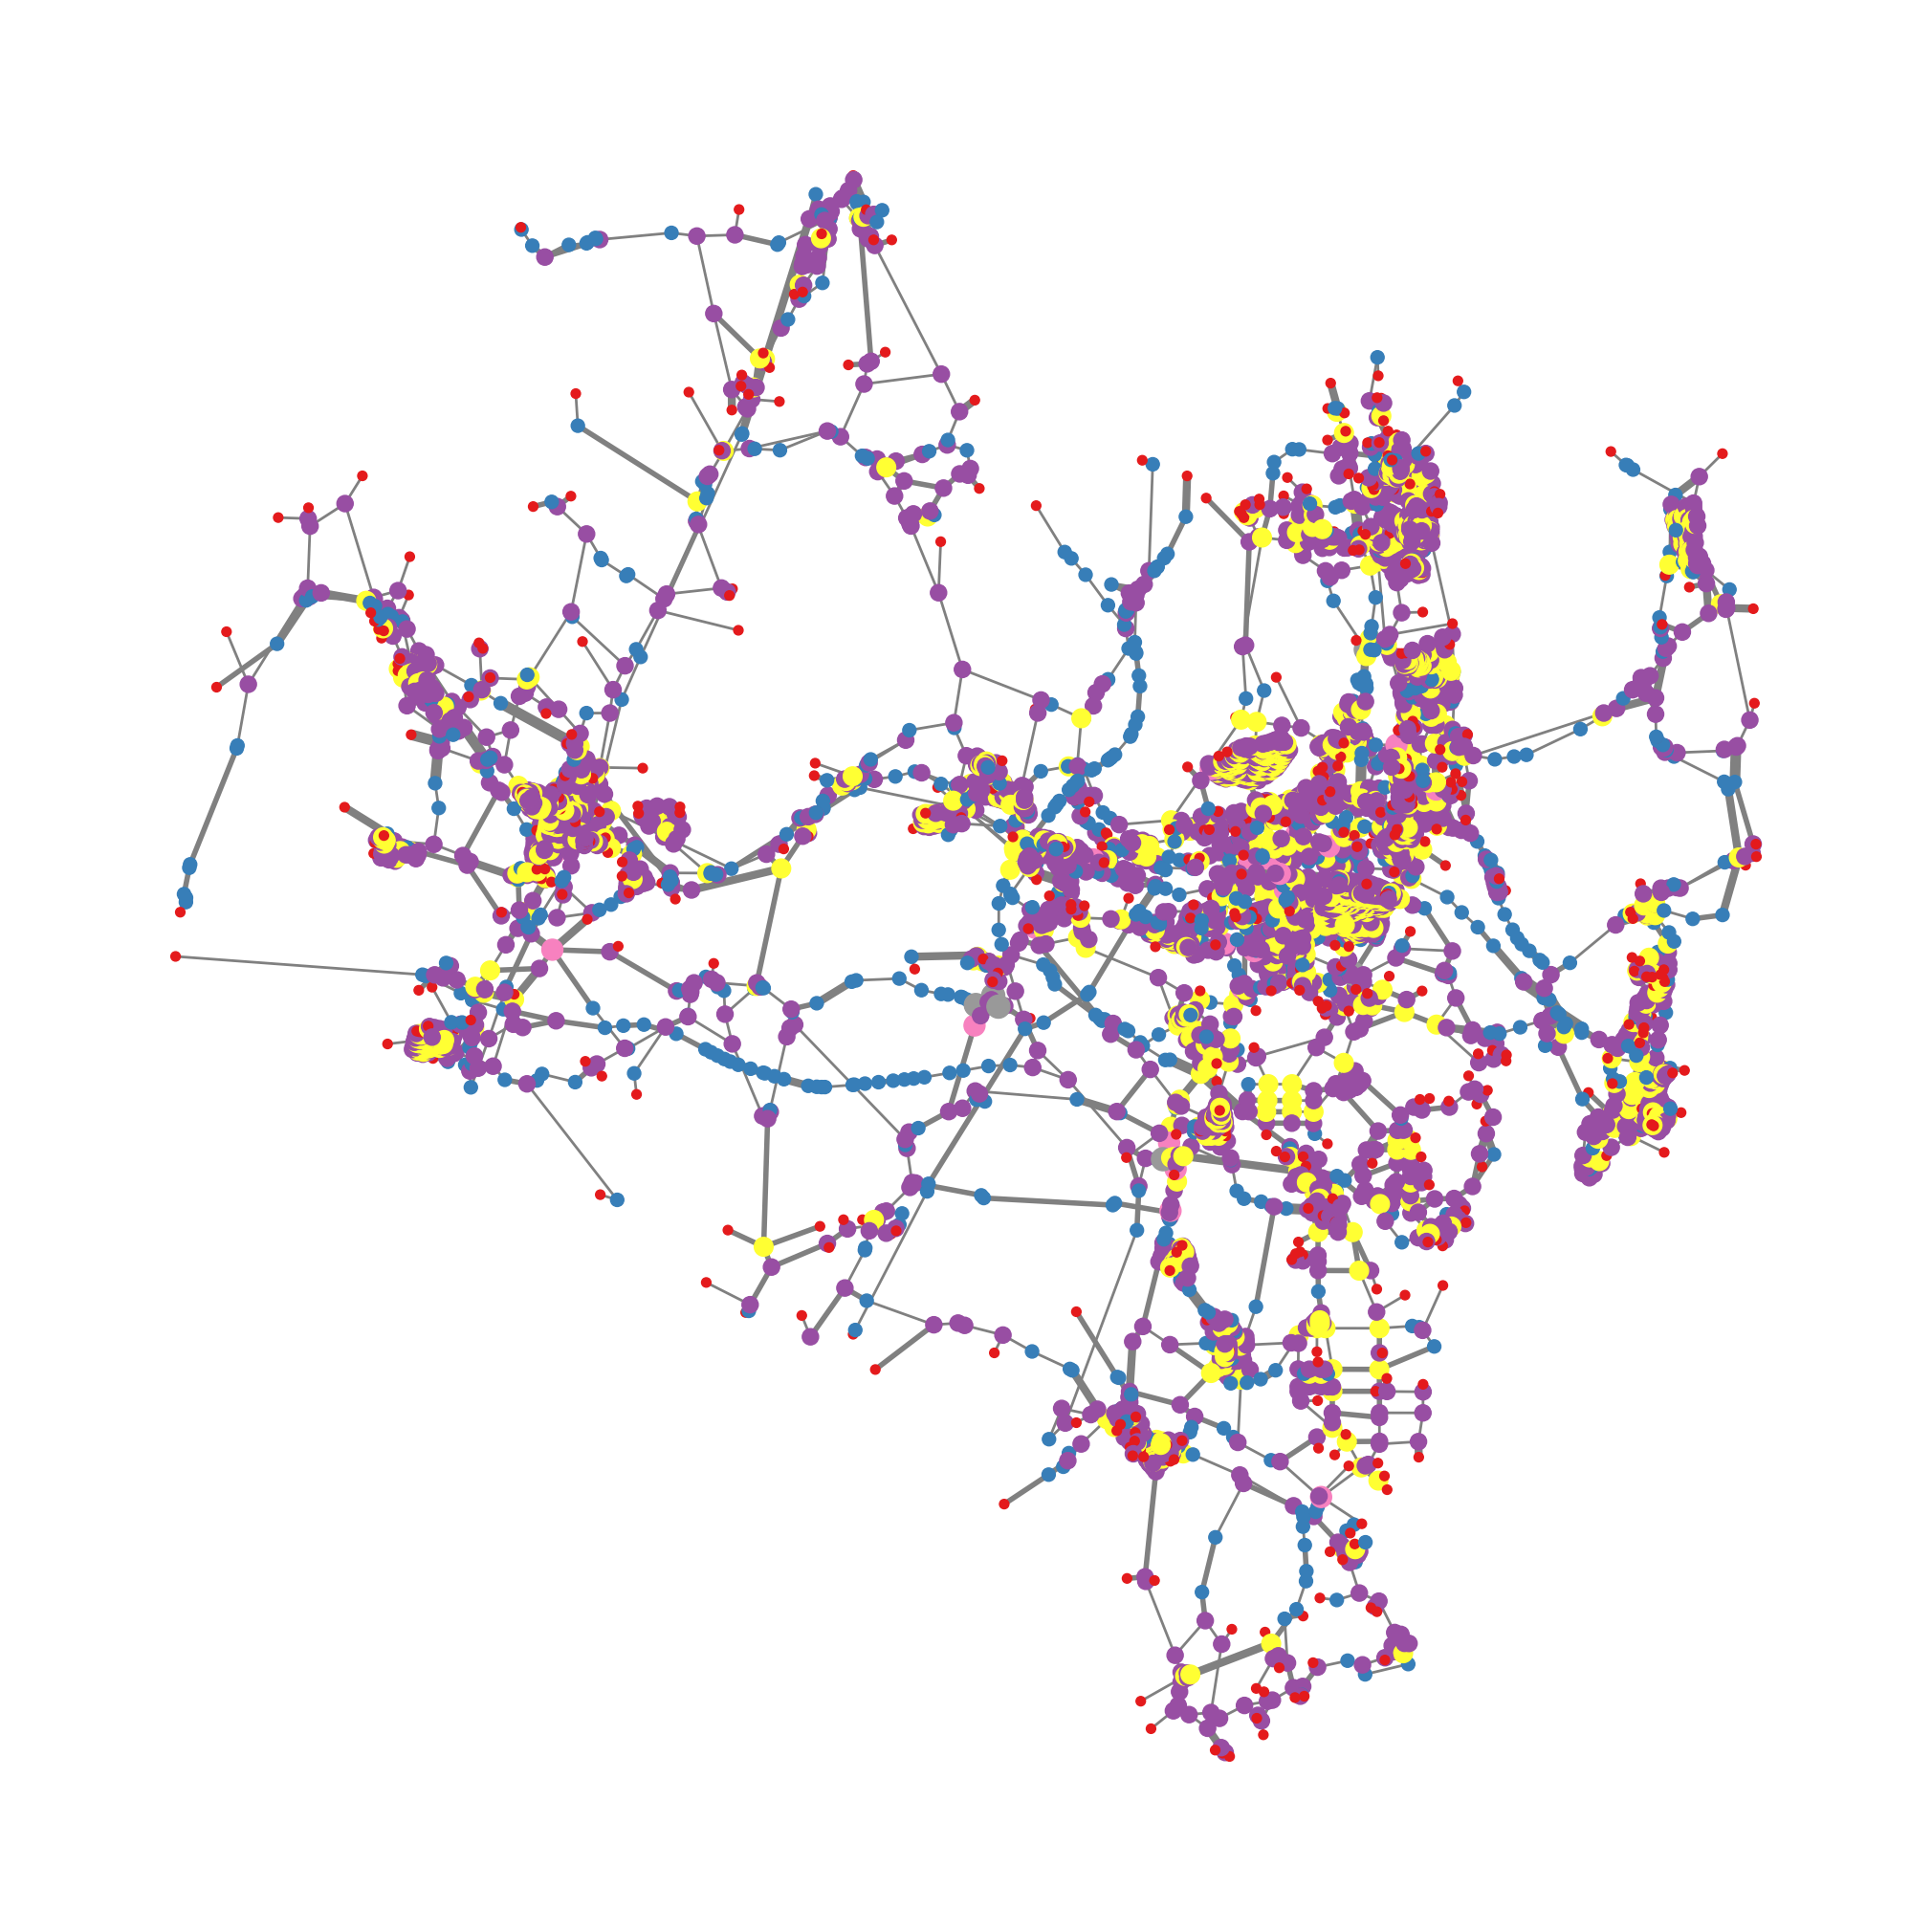

In [15]:
weight=nx.get_edge_attributes(G,'LANES')
#Draw network
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(G,pos,with_labels=False
        ,node_size = [d*50 for d in deg.values()] # node size
        ,node_color=list(deg.values()) # data for label color
        ,cmap=plt.cm.Set1 # color_map #cm.PuOr
        ,edge_color='grey' # data for edge color
        ,width=[2*d for d in weight.values()] # edge width
       )
#plt.title('Ulsan Network');
#plt.savefig('Ulsan.png', format="PNG") # Save figure

STNL REG

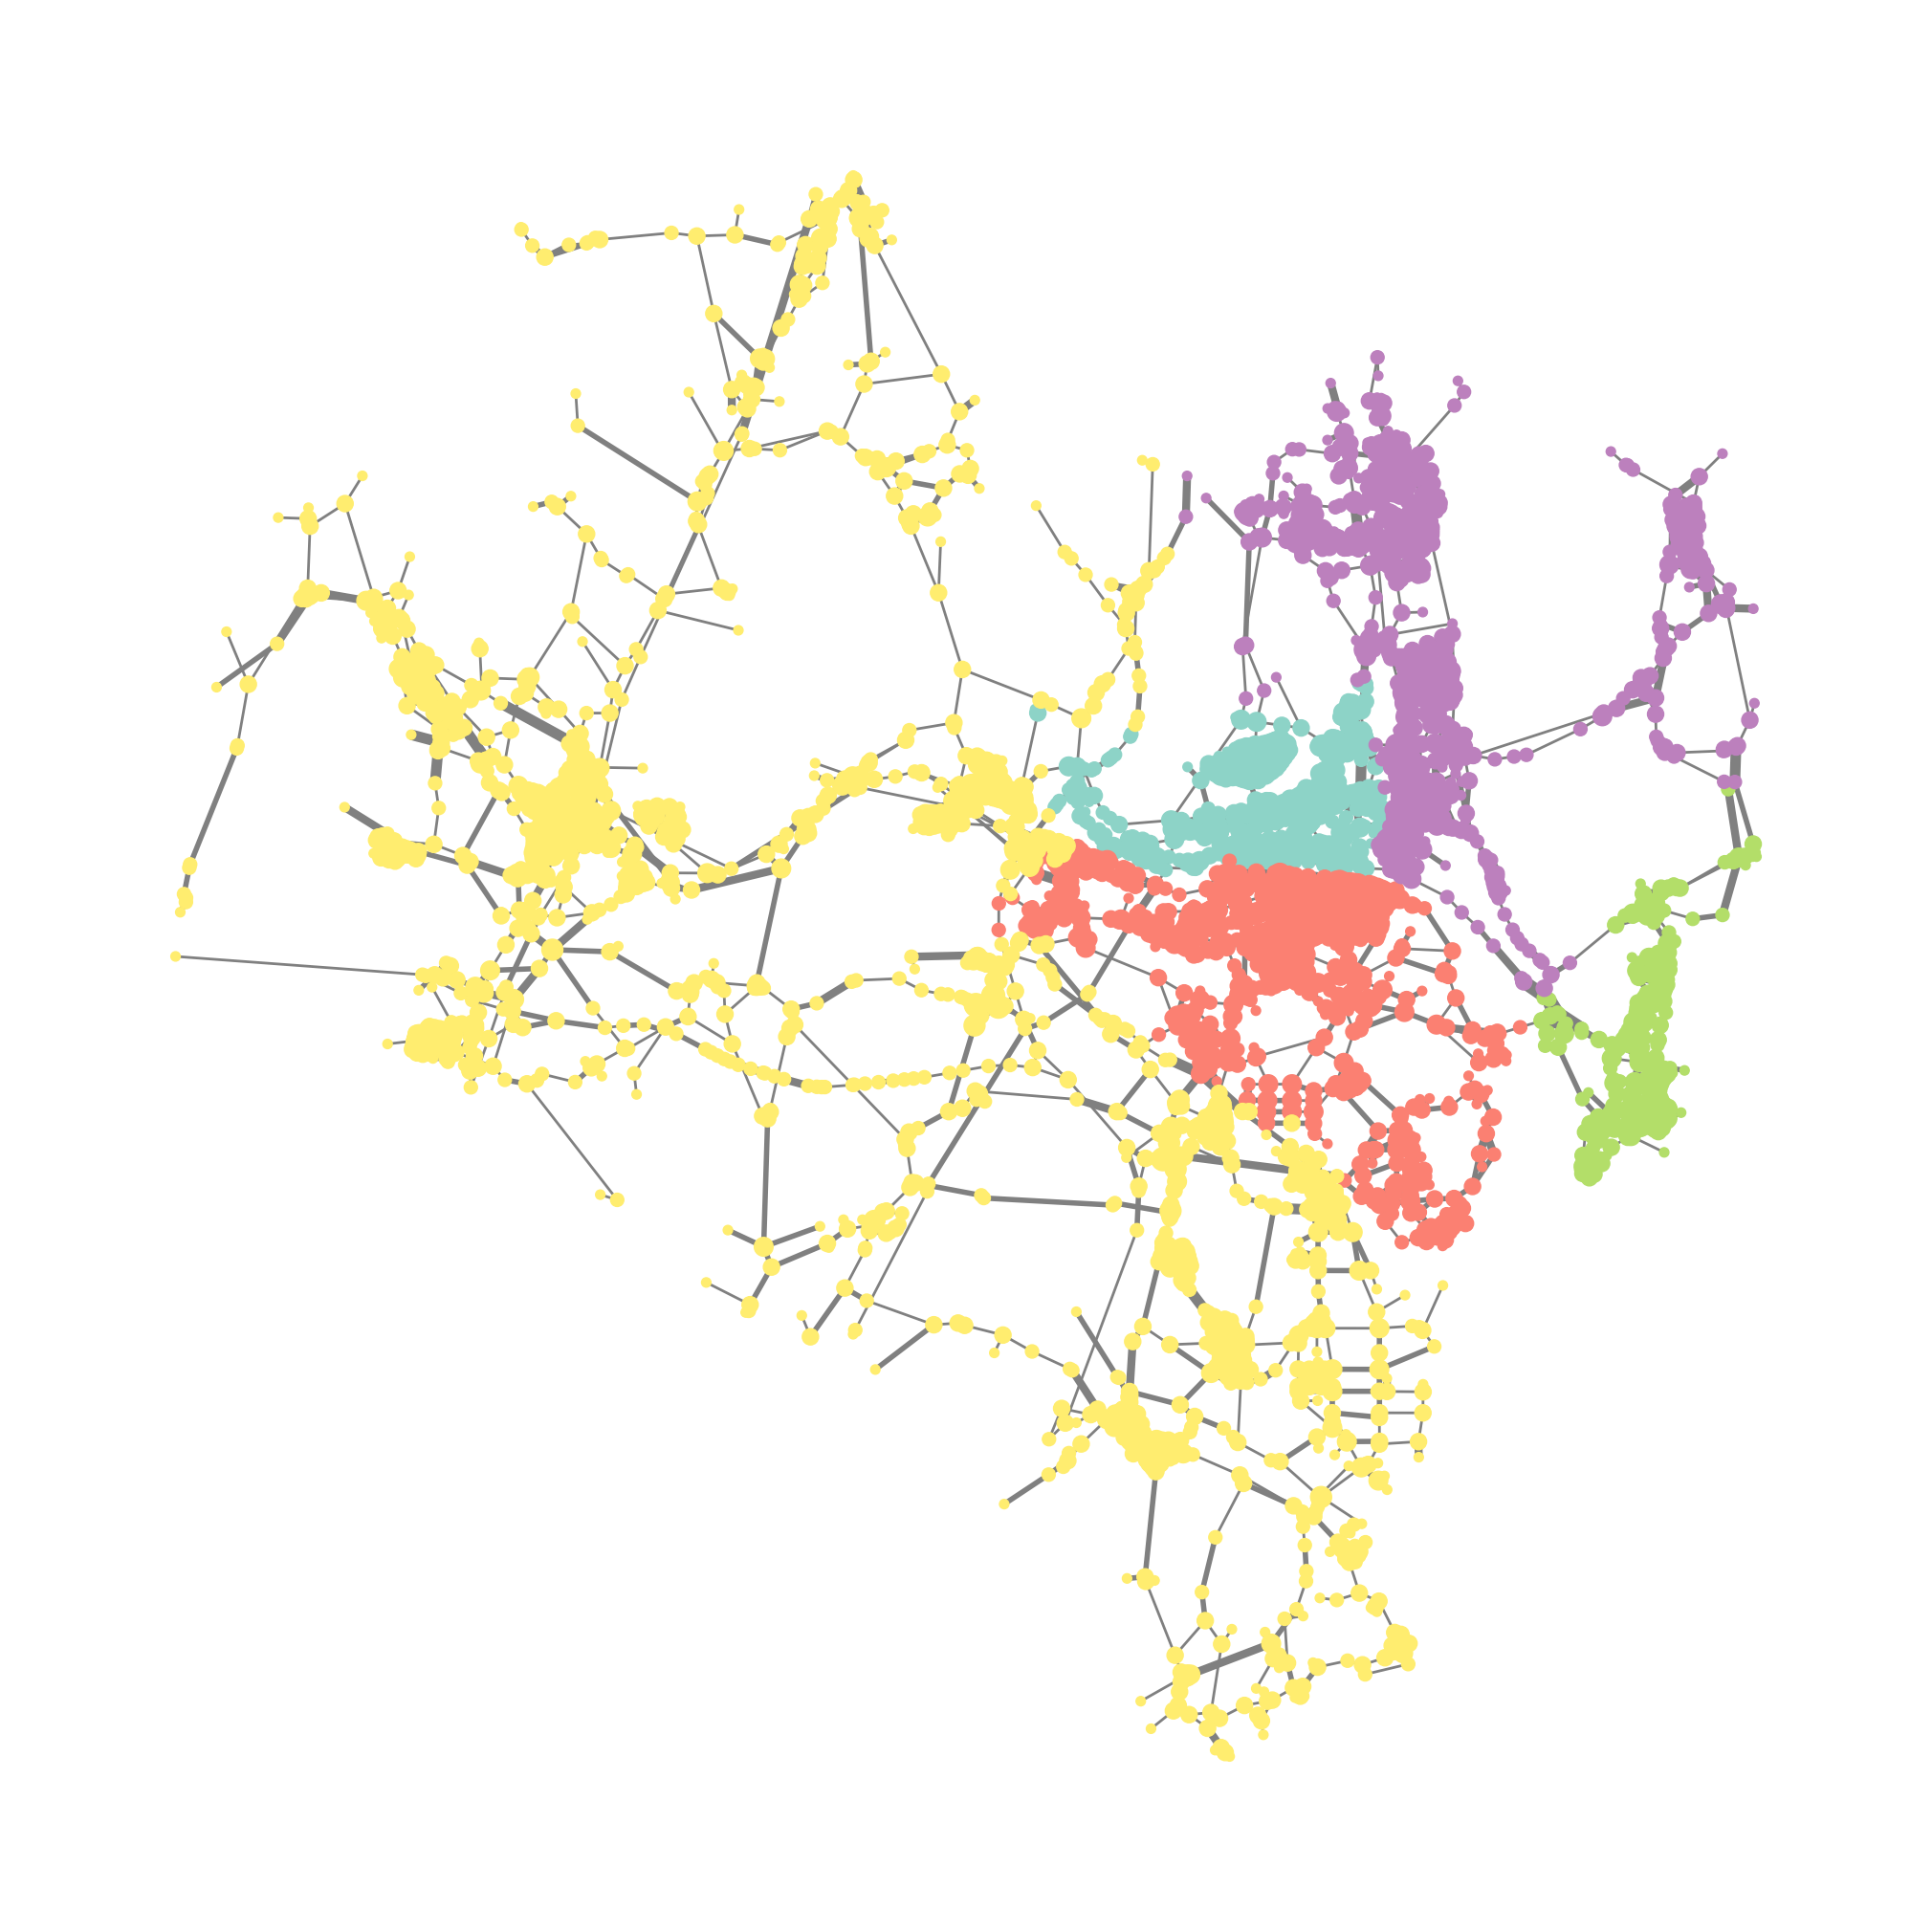

In [16]:
stnl_reg=nx.get_node_attributes(G,'STNL_REG')
stnl_reg=[int(v) for i,v in stnl_reg.items()]
#Draw network
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(G,pos,with_labels=False
        ,node_size = [d*50 for d in deg.values()] # node size
        ,node_color=stnl_reg # data for label color
        ,cmap=plt.cm.Set3 # color_map #cm.PuOr
        ,edge_color='grey' # data for edge color
        ,width=[2*d for d in weight.values()] # edge width
       )
#plt.title('Ulsan Network');
#plt.savefig('Ulsan.png', format="PNG") # Save figure

ValueError: s must be a scalar, or float array-like with the same size as x and y

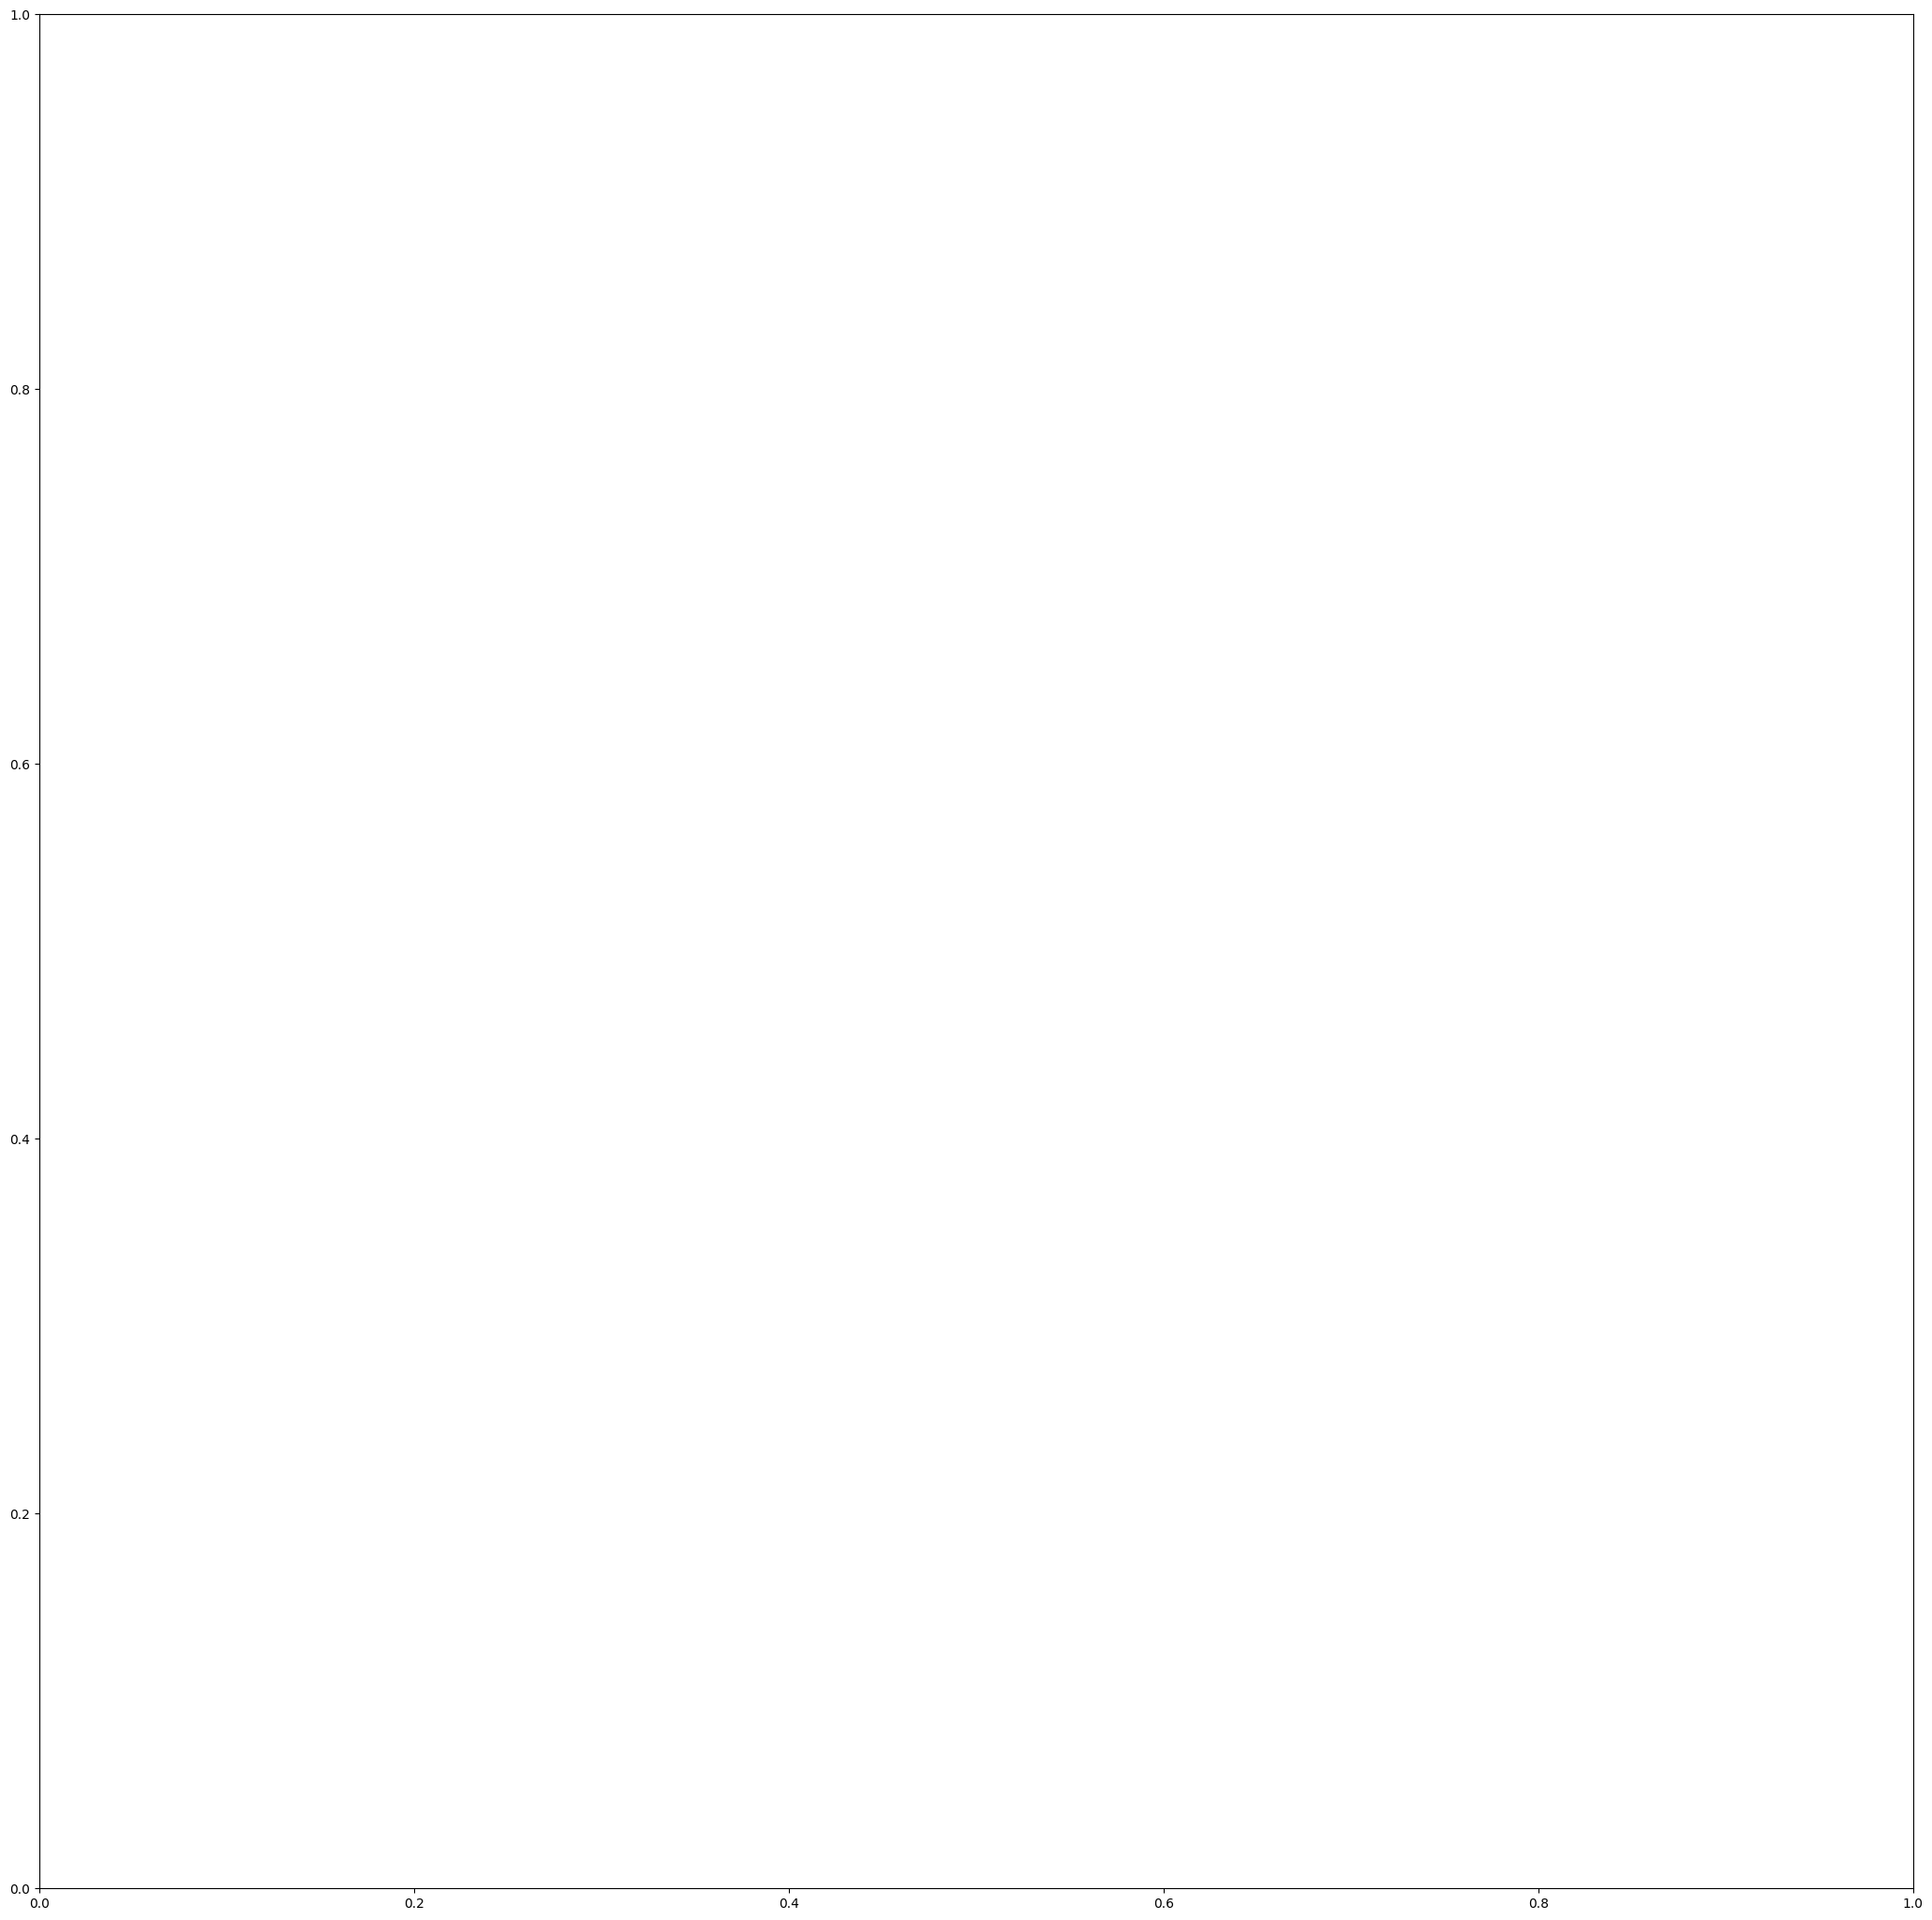

In [17]:
bc=dict(nx.get_node_attributes(G,'Betweenness Centrality'))
#Draw network
plt.figure(figsize=(20,20)) #Control figure size
nx.draw(G,pos,with_labels=False
        ,node_size = [d*10**3 for d in bc.values()] # node size
        ,node_color=list(bc.values()) # data for label color
        ,cmap=plt.cm.bwr # color_map #cm.PuOr
        ,edge_color='grey' # data for edge color
        ,width=[2*d for d in weight.values()] # edge width
       )
#plt.title('Ulsan Network');
#plt.savefig('Ulsan.png', format="PNG") # Save figure